### Jupyter notebook about retail stocks performance in Brazilian market!

In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [41]:
ativos = ['VIIA3','MGLU3', 'LREN3', 'GUAR3', 'CEAB3', 'ARZZ3']

In [42]:
ativos = [i + '.SA' for i in ativos]

In [43]:
inicio = '2022-02-01'
fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yes_str = yesterday.strftime('%Y-%m-%d')
#yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yes_str

'2023-08-21'

In [44]:
df = yf.download(ativos, start = inicio, end = yes_str)['Adj Close']

[                       0%                       ]

[*********************100%***********************]  6 of 6 completed


In [45]:
df.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-08-14,78.330002,6.62,6.81,17.570000,2.84,1.72
2023-08-15,81.300003,6.56,7.16,17.440001,2.77,1.69
2023-08-16,81.180000,6.43,6.92,17.490000,2.97,1.79
2023-08-17,80.269997,6.17,6.81,17.110001,2.82,1.68
2023-08-18,79.110001,6.23,6.89,17.360001,3.00,1.68


#### normalizando os ativos


In [46]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

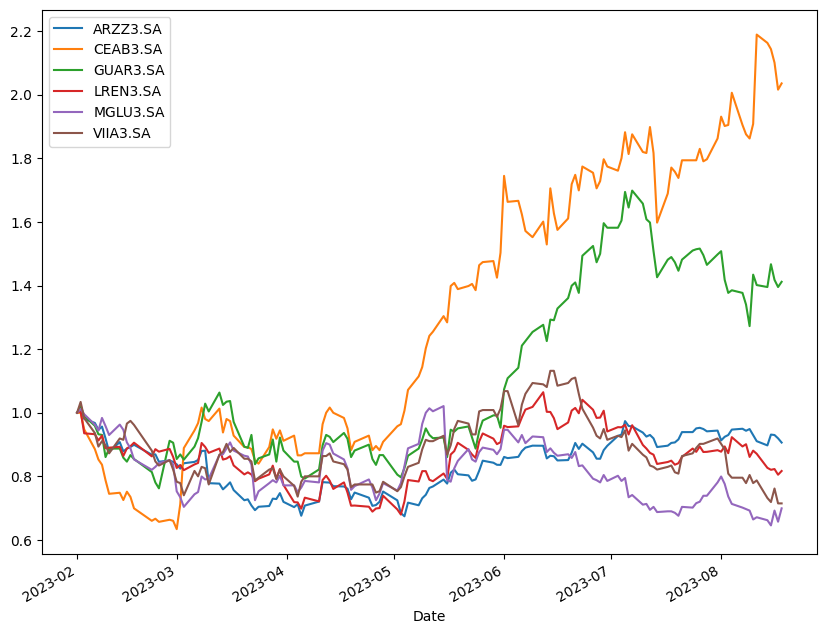

In [47]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [48]:
primeiro = df.iloc[0]

In [49]:
primeiro

ARZZ3.SA    87.291679
CEAB3.SA     3.060000
GUAR3.SA     4.880000
LREN3.SA    21.252483
MGLU3.SA     4.290000
VIIA3.SA     2.350000
Name: 2023-02-01 00:00:00, dtype: float64

In [50]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [51]:
comprados = 10000/primeiro

In [52]:
comprados

ARZZ3.SA     114.558456
CEAB3.SA    3267.973917
GUAR3.SA    2049.180280
LREN3.SA     470.533247
MGLU3.SA    2331.002352
VIIA3.SA    4255.319322
Name: 2023-02-01 00:00:00, dtype: float64

In [53]:
# Número de papéis arredondados
round(comprados, 0)

ARZZ3.SA     115.0
CEAB3.SA    3268.0
GUAR3.SA    2049.0
LREN3.SA     471.0
MGLU3.SA    2331.0
VIIA3.SA    4255.0
Name: 2023-02-01 00:00:00, dtype: float64

In [54]:
comprados = round(comprados, 0)

In [55]:
comprados

ARZZ3.SA     115.0
CEAB3.SA    3268.0
GUAR3.SA    2049.0
LREN3.SA     471.0
MGLU3.SA    2331.0
VIIA3.SA    4255.0
Name: 2023-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [56]:
PL = df*comprados
#PL=df*qntd

In [57]:
PL.head()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-02-01,10038.543129,10000.079813,9999.120234,10009.919666,9999.989911,9999.249594
2023-02-02,10085.186424,10000.079813,10224.509531,10065.376402,10116.540356,10339.650284
2023-02-03,9844.005966,9477.200312,9896.669844,9362.926214,9953.369956,9829.049757
2023-02-06,9716.591034,8856.280125,9589.319648,9335.198296,9627.030267,9361.000203
2023-02-07,9499.301643,8529.479657,9322.950391,9136.478102,9440.550445,8935.499594


In [58]:
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-08-14,9007.950211,21634.159626,13953.689883,8275.469856,6620.039800,7318.600122
2023-08-15,9349.500351,21438.079813,14670.839687,8214.240252,6456.869956,7190.950243
2023-08-16,9335.700035,21013.239439,14179.080156,8237.789892,6923.070067,7616.449838
2023-08-17,9231.049614,20163.560249,13953.689883,8058.810287,6573.419844,7148.399777
2023-08-18,9097.650070,20359.640062,14117.609726,8176.560287,6993.000000,7148.399777


In [59]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [60]:
#PL.head()
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,
2023-08-14,9007.950211,21634.159626,13953.689883,8275.469856,6620.039800,7318.600122,66809.909497
2023-08-15,9349.500351,21438.079813,14670.839687,8214.240252,6456.869956,7190.950243,67320.480302
2023-08-16,9335.700035,21013.239439,14179.080156,8237.789892,6923.070067,7616.449838,67305.329427
2023-08-17,9231.049614,20163.560249,13953.689883,8058.810287,6573.419844,7148.399777,65128.929655
2023-08-18,9097.650070,20359.640062,14117.609726,8176.560287,6993.000000,7148.399777,65892.859923


In [61]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [62]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,113430.0,113598.0,110729.0,112303.0,112303.0,17821500
2023-02-02,112072.0,112943.0,109747.0,109935.0,109935.0,15241800
2023-02-03,110141.0,110570.0,108185.0,108490.0,108490.0,13235300
2023-02-06,108518.0,108710.0,107416.0,108456.0,108456.0,11514600
2023-02-07,108727.0,109037.0,107234.0,107920.0,107920.0,12956300


In [63]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [64]:
ibov = ibov[['Ibov']]

In [65]:
ibov

,Ibov
Date,
2023-02-01,112303.0
2023-02-02,109935.0
2023-02-03,108490.0
2023-02-06,108456.0
2023-02-07,107920.0
...,...
2023-08-10,118350.0
2023-08-11,118065.0
2023-08-14,116810.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [66]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [67]:
novo_df.head()

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2023-02-01,112303.0,10038.543129,10000.079813,9999.120234,10009.919666,9999.989911,9999.249594,60046.902348
2023-02-02,109935.0,10085.186424,10000.079813,10224.509531,10065.376402,10116.540356,10339.650284,60831.342810
2023-02-03,108490.0,9844.005966,9477.200312,9896.669844,9362.926214,9953.369956,9829.049757,58363.222048
2023-02-06,108456.0,9716.591034,8856.280125,9589.319648,9335.198296,9627.030267,9361.000203,56485.419572
2023-02-07,107920.0,9499.301643,8529.479657,9322.950391,9136.478102,9440.550445,8935.499594,54864.259832


<Axes: xlabel='Date'>

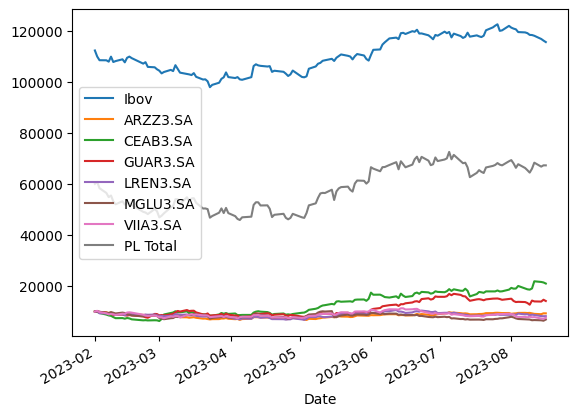

In [68]:
novo_df.plot()

In [69]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [70]:
novo_normalizado

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2023-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-02-02,97.891419,100.464642,100.000000,102.254091,100.554018,101.165506,103.404262,101.306380
2023-02-03,96.604721,98.062098,94.771247,98.975406,93.536477,99.533800,98.297874,97.196058
2023-02-06,96.574446,96.792840,88.562094,95.901634,93.259473,96.270400,93.617027,94.068832
2023-02-07,96.097166,94.628289,85.294116,93.237707,91.274240,94.405600,89.361702,91.369009
...,...,...,...,...,...,...,...,...
2023-08-10,105.384540,92.964189,190.849682,143.442620,88.083821,66.433565,77.872345,109.926554
2023-08-11,105.130762,91.062514,218.954246,140.163934,87.095705,67.132870,78.723408,113.836596
2023-08-14,104.013250,89.733641,216.339870,139.549176,82.672690,66.200465,73.191494,111.262874


<Axes: xlabel='Date'>

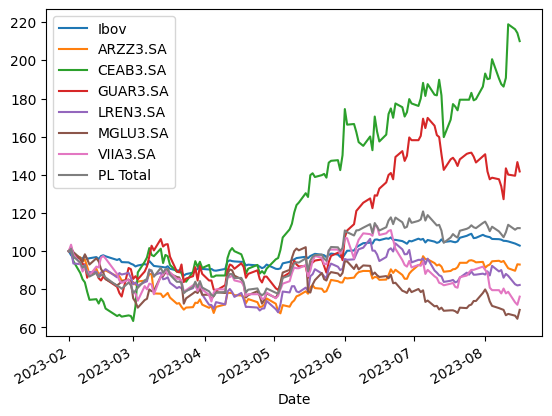

In [71]:
novo_normalizado.plot()

<Axes: >

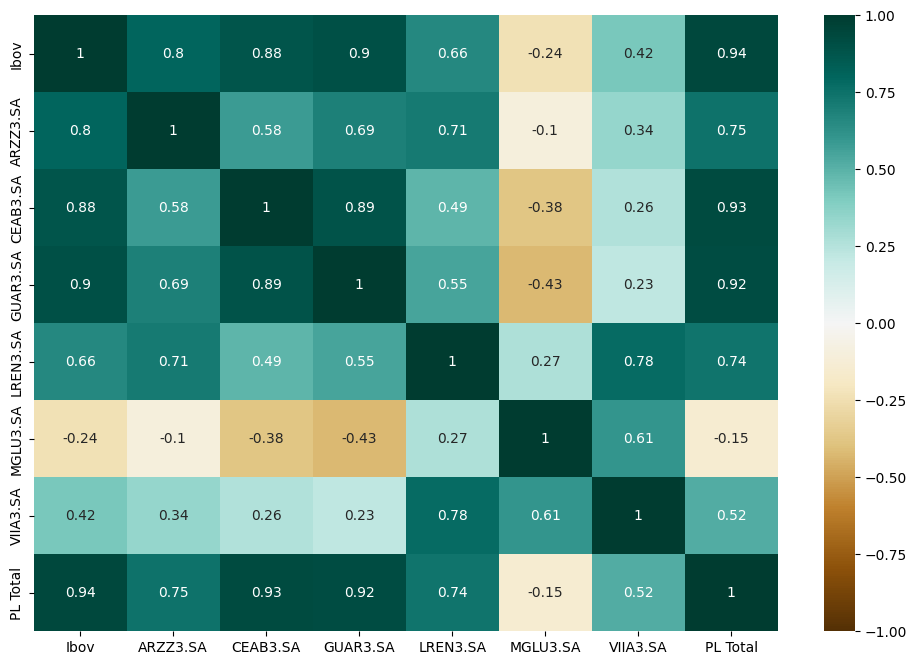

In [72]:
plt.figure(figsize = (12,8))

sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

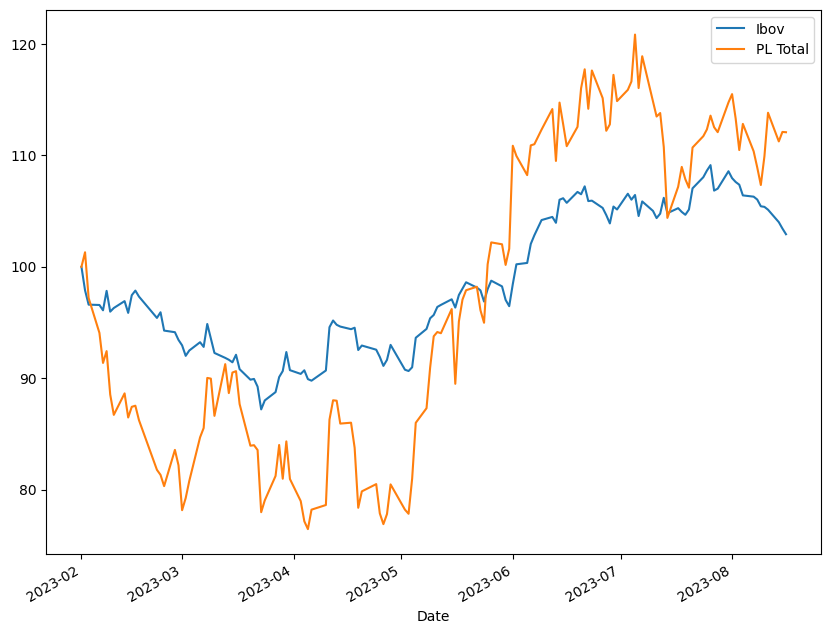

In [73]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (10,8))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [74]:
ativos

['VIIA3.SA', 'MGLU3.SA', 'LREN3.SA', 'GUAR3.SA', 'CEAB3.SA', 'ARZZ3.SA']